In [1]:
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.feature_selection import RFE


from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve


# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [2]:
df_credit_data = pd.read_csv('UCI_Credit_card.csv')



In [3]:

df_credit_data = df_credit_data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAYMENT' })



df_credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAYMENT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
X = df_credit_data.drop(["DEF_PAYMENT"], axis=1)

In [5]:
y = df_credit_data["DEF_PAYMENT"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)

X_test_scaled = scaler.transform(X_test.values)

In [8]:
#checking the data proportion 

print("Before SMOTE count of '1' on training set: {}".format(sum(y_train == 1))) 
print("Before SMOTE count of '0' on training set: {} \n".format(sum(y_train == 0))) 

Before SMOTE count of '1' on training set: 5309
Before SMOTE count of '0' on training set: 18691 



In [9]:
# Using SMOTE techniques to resolve the class imbalance since the class 1 was only 20%

from imblearn.over_sampling import SMOTE 
Smoted = SMOTE(random_state = 2) 
X_train_smoted, y_train_smoted = Smoted.fit_sample(X_train_scaled, y_train.ravel())

In [10]:
print("After SMOTE, counts of label '1' on training set: {}".format(sum(y_train_smoted == 1))) 
print("After SMOTE, counts of label '0' on training set: {}".format(sum(y_train_smoted == 0)))

After SMOTE, counts of label '1' on training set: 18691
After SMOTE, counts of label '0' on training set: 18691


### Logistic Regression

In [11]:
# Create classifier and Train the data


lr = LogisticRegression(solver= 'liblinear', C=1, verbose=2)
lr.fit(X_train_smoted, y_train_smoted.ravel())
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*lr.score(X_train_smoted, y_train_smoted)))
print("Test set: {:6.2f}%".format(100*lr.score(X_test, y_test)))

[LibLinear]The score for logistic regression is
Training:  67.92%
Test set:  77.88%


In [12]:



# print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr.predict(X_test_scaled)))

# #This shows us we predicted Correctly - True positive 3202 and True negative 841
# # Incorrectly predicted False Positive 1471 and False Positive 486



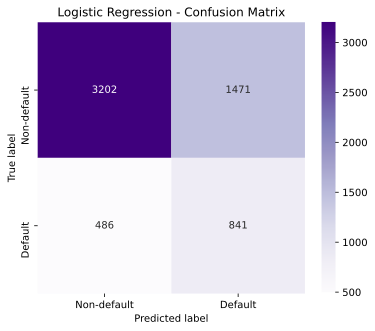

In [13]:

#This shows us we predicted Correctly - True positive 3202 and True negative 841
# Incorrectly predicted False Positive 1471 and False Positive 486


plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_test,lr.predict(X_test_scaled))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Logistic Regression - Confusion Matrix");


#486+841=1327   841/1327=63.37%

#False positive 1471 

In [14]:
# Metrics 

y_pred = lr.predict(X_test_scaled)
print('Accuracy Score : '+ str(accuracy_score(y_test, y_pred ))) 
print('Preciscion: ' + str(precision_score(y_test, y_pred ))) 
print('Recall: ' + str (recall_score(y_test, y_pred ))) 
print('F1 Score: ' +str (f1_score(y_test, y_pred ))) 




Accuracy Score : 0.6738333333333333
Preciscion: 0.36375432525951557
Recall: 0.6337603617181613
F1 Score: 0.4622148942017038


In [15]:
#Let's take a look closer what above score means 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.62      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000



In [16]:
# # Print confusion matrix for logistic regression
# logit_confusion = confusion_matrix(y_test, lr.predict(X_test_scaled))
# plt.figure(dpi=150)
# sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
#            xticklabels=df_credit_data['DEF_PAYMENT'],
#            yticklabels=df_credit_data['DEF_PAYMENT'])

# plt.xlabel('Predicted species')
# plt.ylabel('Actual species')
# plt.title('Logistic regression confusion matrix');

# plt.savefig("confusion_matrix_credit_data")

In [17]:

log_odds = lr.coef_[0]


In [18]:
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
PAY_1,0.601510
BILL_AMT5,0.128359
BILL_AMT3,0.114533
PAY_2,0.096818
PAY_3,0.089796
BILL_AMT4,0.055680
BILL_AMT2,0.054974
AGE,0.054653
PAY_4,0.044359
ID,-0.005974


Text(0.5, 1.0, 'Logistic Regression Coef')

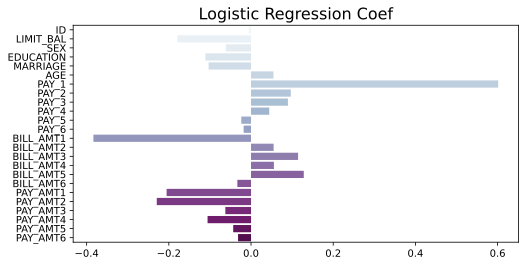

In [19]:
plt.figure(figsize = (8,4))
sns.barplot(x = log_odds, y = X.columns, palette="BuPu" )
plt.title('Logistic Regression Coef',fontsize=16)





In [76]:
df_credit_data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAYMENT
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


### Deciscion_Tree

In [20]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train_scaled, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test_scaled)

In [21]:
dt = classifier.predict(X_test_scaled)

# Metrics 



print('Accuracy Score : '+ str(accuracy_score(y_test, dt ))) 
print('Preciscion: ' + str(precision_score(y_test, dt  ))) 
print('Recall: ' + str (recall_score(y_test, dt  ))) 
print('F1 Score: ' +str (f1_score(y_test, dt  ))) 


Accuracy Score : 0.8096666666666666
Preciscion: 0.6244952893674294
Recall: 0.3496608892238131
F1 Score: 0.44830917874396137


In [22]:
print("The score for Deciscion Tree is")
print("Training: {:6.2f}%".format(100*classifier.score(X_train_scaled, y_train)))
print("Test set: {:6.2f}%".format(100*classifier.score(X_test_scaled, y_test)))

The score for Deciscion Tree is
Training:  84.48%
Test set:  80.97%


In [23]:
print(classification_report(y_test, dt))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.62      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [24]:
# print("Deciscion Tree confusion matrix: \n\n", confusion_matrix(y_test, classifier.predict(X_test_scaled)))

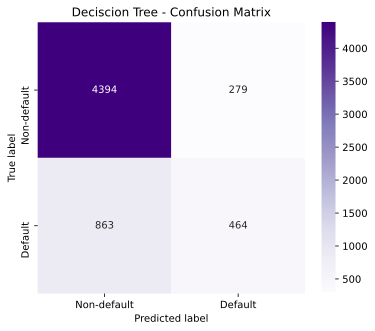

In [25]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_test,classifier.predict(X_test_scaled))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Deciscion Tree - Confusion Matrix");

# 34% -

### NaiveBayes

In [26]:
NBC = GaussianNB()

In [27]:
NBC.fit(X_train_scaled, y_train)

GaussianNB()

In [28]:
nbc = NBC.predict(X_test_scaled)

# Metrics 



print('Accuracy Score : '+ str(accuracy_score(y_test, nbc))) 
print('Preciscion: ' + str(precision_score(y_test, nbc  ))) 
print('Recall: ' + str (recall_score(y_test, nbc  ))) 
print('F1 Score: ' +str (f1_score(y_test, nbc  ))) 

Accuracy Score : 0.7523333333333333
Preciscion: 0.451316595223515
Recall: 0.5553880934438583
F1 Score: 0.497972972972973


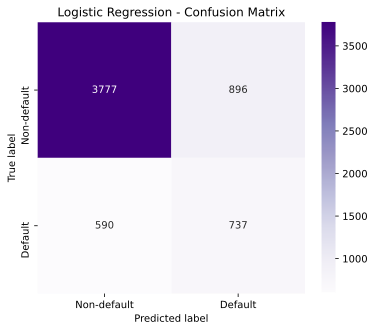

In [29]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_test,NBC.predict(X_test_scaled))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Logistic Regression - Confusion Matrix");

In [30]:

print(classification_report(y_test, nbc))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000



### Random Forest

In [31]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train_scaled, y_train)
# do our predictions on the test
random_predict = randomforest.predict(X_test_scaled)

In [32]:
print("The score for Deciscion Tree is")
print("Training: {:6.2f}%".format(100*randomforest.score(X_train_scaled, y_train)))
print("Test set: {:6.2f}%".format(100*randomforest.score(X_test_scaled, y_test)))

The score for Deciscion Tree is
Training: 100.00%
Test set:  81.20%


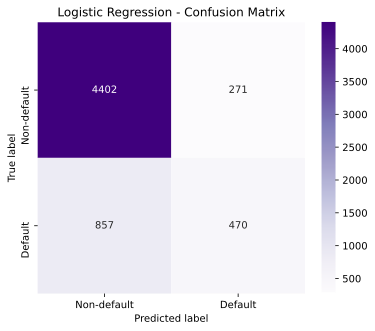

In [33]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_test,randomforest.predict(X_test_scaled))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Logistic Regression - Confusion Matrix");

In [34]:
features =df_credit_data.drop(['DEF_PAYMENT'], axis=1)


In [35]:
# Metrics 


print('Accuracy Score : '+ str(accuracy_score(y_test, random_predict ))) 
print('Preciscion: ' + str(precision_score(y_test, random_predict ))) 
print('Recall: ' + str (recall_score(y_test, random_predict ))) 
print('F1 Score: ' +str (f1_score(y_test, random_predict ))) 

Accuracy Score : 0.812
Preciscion: 0.6342780026990553
Recall: 0.3541823662396383
F1 Score: 0.45454545454545453


In [36]:
print(classification_report(y_test, random_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [37]:
randomforest.feature_importances_

array([0.07023613, 0.05230338, 0.01080369, 0.01732179, 0.01213392,
       0.0569335 , 0.10403257, 0.03915044, 0.03135337, 0.02295369,
       0.0160643 , 0.01826679, 0.055314  , 0.04983699, 0.04701641,
       0.04624529, 0.04608417, 0.04665931, 0.04620114, 0.04462982,
       0.04375308, 0.04005926, 0.04114365, 0.04150329])

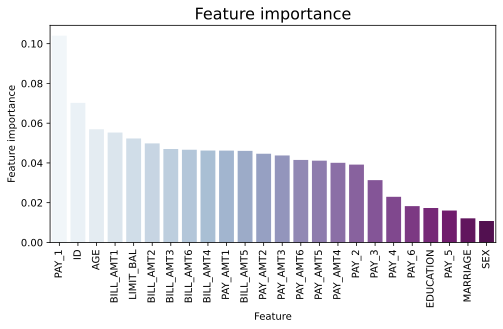

In [38]:
tmp = pd.DataFrame({'Feature': features.columns, 'Feature importance': randomforest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (8,4))
plt.title('Feature importance',fontsize=16)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="BuPu")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [39]:
classifiers = [LogisticRegression(solver= 'liblinear', C=1, verbose=2), 
                GaussianNB(), 
               DecisionTreeClassifier(max_depth=10, random_state=14),
               RandomForestClassifier(n_estimators=100)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_smoted, y_train_smoted)
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[LibLinear]

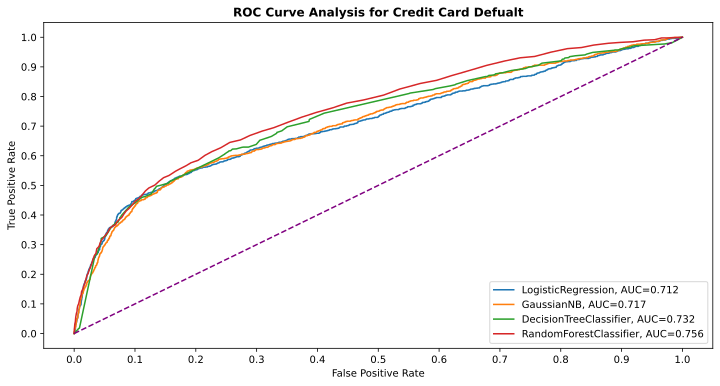

In [40]:
fig = plt.figure(figsize=(12,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='purple', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis for Credit Card Defualt', fontweight='bold', fontsize=12)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

### Regression Model Featuare Engineering

In [41]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'],
                      columns =['LogisticRegression', 'TreeBased', 'NaiveBased''RandomForest'])
                    

In [42]:
from sklearn.metrics import precision_recall_curve

precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true = y_test, probas_pred=NBC.predict_proba(X_test_scaled)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true = y_test, probas_pred=lr.predict_proba(X_test_scaled)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true = y_test, probas_pred=classifier.predict_proba(X_test_scaled)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true = y_test, probas_pred=randomforest.predict_proba(X_test_scaled)[:,1])

<ipython-input-43-dae60de95e51>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(precision_nb, recall_nb, Label ='GaussianNB',color='orange')
<ipython-input-43-dae60de95e51>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(precision_lr, recall_lr, Label ='LogisticRegression')
<ipython-input-43-dae60de95e51>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(precision_dt, recall_dt, Label ='DeciscionTree', color ='green')
<ipython-input-43-dae60de95e51>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(precision_rf, recall_rf, Label ='RandomForest', color='red')


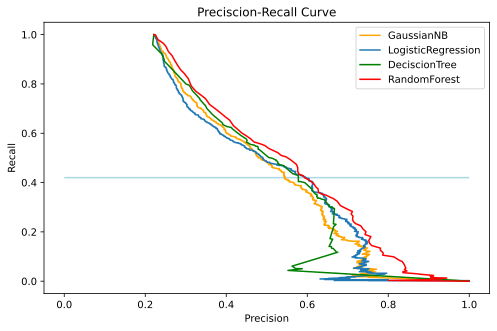

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_nb, recall_nb, Label ='GaussianNB',color='orange')
ax.plot(precision_lr, recall_lr, Label ='LogisticRegression')
ax.plot(precision_dt, recall_dt, Label ='DeciscionTree', color ='green')
ax.plot(precision_rf, recall_rf, Label ='RandomForest', color='red')

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Preciscion-Recall Curve')
ax.legend()
ax.hlines(y=0.42, xmin=0, xmax=1, color='lightblue')


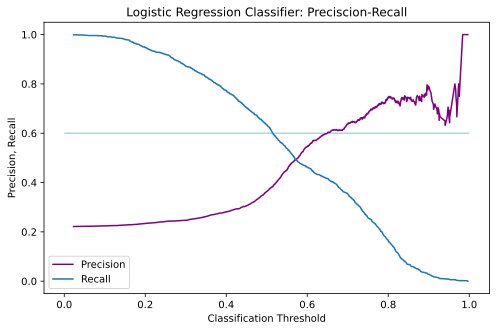

In [44]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(thresholds_lr, precision_lr[1:], label ='Precision', color='purple')
ax.plot(thresholds_lr, recall_lr[1:], label ='Recall')


ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Preciscion-Recall')

ax.hlines(y=0.6, xmin=0, xmax=1, color='lightblue')
ax.legend()

In [45]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat.columns,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
6,PAY_1,0.487778
7,PAY_2,0.101795
12,BILL_AMT1,0.049223
20,PAY_AMT3,0.045976
1,LIMIT_BAL,0.041159
5,AGE,0.029602
10,PAY_5,0.028972
0,ID,0.028837
22,PAY_AMT5,0.021694
19,PAY_AMT2,0.020167


In [46]:
top_five_features = df_credit_data[['PAY_1', 'ID','PAY_2', 'BILL_AMT1', 'PAY_AMT3', 'LIMIT_BAL', 'DEF_PAYMENT',]]


In [47]:
def customer_split_data(df, test_size=.2, seed=42, stratify=y):

    rs = np.random.RandomState(seed)
    
    Smoted = SMOTE(random_state = 2) 
    
    

    
    
    total_users = df['ID'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['ID'].isin(test_users)]
    df_te = df[df['ID'].isin(test_users)] 

    y_tr, y_te = df_tr['DEF_PAYMENT'], df_te['DEF_PAYMENT']
    X_tr = df_tr.drop(['ID', 'BILL_AMT1', 'PAY_AMT3', 'LIMIT_BAL', 'DEF_PAYMENT'],axis=1) 
    X_te = df_te.drop(['ID', 'BILL_AMT1', 'PAY_AMT3', 'LIMIT_BAL', 'DEF_PAYMENT'],axis=1)
    
    X_train_smoted, y_train_smoted = Smoted.fit_sample(X_tr, y_tr)

    return X_train_smoted, X_te, y_train_smoted, y_te

In [48]:
#Top 2 features 

X_train_smoted, X_te, y_train_smoted, y_te = customer_split_data(top_five_features)

lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train_smoted, y_train_smoted)


print('f1 score is ', f1_score(lr2.predict(X_te), y_te))



f1 score is  0.5076179858788553


In [49]:
X_te.shape


(6000, 2)

In [50]:
X_te.columns

Index(['PAY_1', 'PAY_2'], dtype='object')

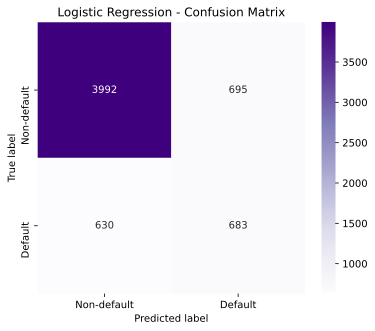

In [51]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_te,lr2.predict(X_te))
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Logistic Regression - Confusion Matrix");


#True Positive 3992 - went up
#True Negative 683 - went up
#False Positive 695 - went down
#False Negative 630 - wennt down






In [52]:
y_predict = lr2.predict(X_te)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1: {:6.4f}".format(precision_score(y_te, y_predict), 
                                                     recall_score(y_te, y_predict),
                                                      f1_score(y_te, y_predict)  ))



Default threshold:
Precision: 0.4956,   Recall: 0.5202,   f1: 0.5076


In [53]:
print(classification_report(y_te, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4687
           1       0.50      0.52      0.51      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [54]:
# using the new threshold of 0.20
y_predict = (lr2.predict_proba(X_te)[:,1] > 0.20)
print("Threshold of 0.20:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1: {:6.4f}".format(precision_score(y_te, y_predict), 
                                                     recall_score(y_te, y_predict),
                                                      f1_score(y_te, y_predict)  ))



Threshold of 0.20:
Precision: 0.2267,   Recall: 0.9467,   f1: 0.3659


In [55]:
print(classification_report(y_te, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.10      0.17      4687
           1       0.23      0.95      0.37      1313

    accuracy                           0.28      6000
   macro avg       0.55      0.52      0.27      6000
weighted avg       0.73      0.28      0.21      6000



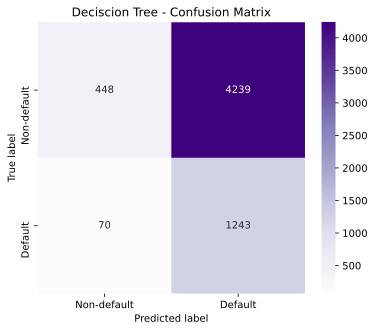

In [56]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_te, y_predict)
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Deciscion Tree - Confusion Matrix");

In [57]:
# using the new threshold of 0.45
y_predict1 = (lr2.predict_proba(X_te)[:,1] > 0.45)
print("Threshold of 0.45:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1: {:6.4f}".format(precision_score(y_te, y_predict), 
                                                     recall_score(y_te, y_predict),
                                                      f1_score(y_te, y_predict)  ))


Threshold of 0.45:
Precision: 0.2267,   Recall: 0.9467,   f1: 0.3659


In [58]:
print(classification_report(y_te, y_predict1))

              precision    recall  f1-score   support

           0       0.86      0.32      0.47      4687
           1       0.25      0.81      0.38      1313

    accuracy                           0.43      6000
   macro avg       0.55      0.57      0.43      6000
weighted avg       0.73      0.43      0.45      6000



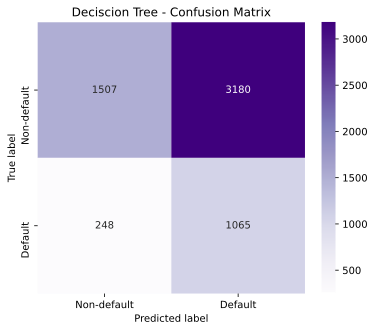

In [59]:
plt.figure(figsize=(6,5))
ConfMatrix = confusion_matrix(y_te, y_predict1)
sns.heatmap(ConfMatrix,annot=True, cmap="Purples", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Deciscion Tree - Confusion Matrix");

In [60]:
# using the new threshold of 0.65
y_predict = (lr2.predict_proba(X_te)[:,1] > 0.65)
print("Threshold of 0.65:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1: {:6.4f}".format(precision_score(y_te, y_predict), 
                                                     recall_score(y_te, y_predict),
                                                      f1_score(y_te, y_predict)  ))


Threshold of 0.65:
Precision: 0.5812,   Recall: 0.4387,   f1: 0.5000


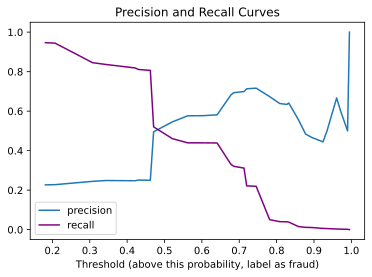

In [61]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_te, lr2.predict_proba(X_te)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color='purple')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [62]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 


fpr, tpr, thresholds = roc_curve(y_te, lr2.predict_proba(X_te)[:,1])

Logistic Regression ROC AUC score  =  0.6976779122497108


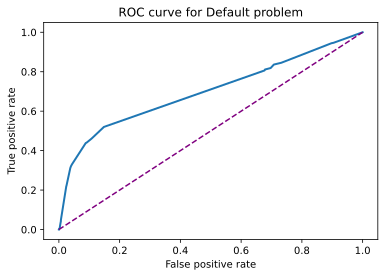

In [63]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='purple',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Default problem');
print("Logistic Regression ROC AUC score  = ", roc_auc_score(y_te, lr2.predict_proba(X_te)[:,1]))


In [64]:
# X_train_smoted1, X_te, y_train_smoted1, y_te = customer_split_data(positive_coef)

# lr3 = LogisticRegression(solver='lbfgs')
# lr3.fit(X_train_smoted1, y_train_smoted1)


# print('f1 score is ', f1_score(lr3.predict(X_te), y_te))

In [65]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': [ 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,100]}
grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
grid_clf.fit(X_train_smoted, y_train_smoted)
grid_best = grid_clf.best_estimator_

#Predict values based on new parameters
y_pred_grid = grid_best.predict(X_te)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_te,y_pred_grid)))
print('Precision Score : ' + str(precision_score(y_te,y_pred_grid)))
print('Recall Score : ' + str(recall_score(y_te,y_pred_grid)))
print('F1 Score : ' + str(f1_score(y_te,y_pred_grid)))

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_te,y_pred_grid)

Accuracy Score : 0.7791666666666667
Precision Score : 0.49564586357039186
Recall Score : 0.5201827875095202
F1 Score : 0.5076179858788553


In [66]:
positive_coef = df_credit_data[['PAY_1', 'PAY_2','PAY_3','PAY_4', 'PAY_AMT3','ID', 'LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5', 'AGE', 'DEF_PAYMENT']]


In [67]:
X_train_smoted1, X_te1, y_train_smoted1, y_te1 = customer_split_data(positive_coef)

lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train_smoted1, y_train_smoted1)


print('f1 score is ', f1_score(lr2.predict(X_te1), y_te1))

f1 score is  0.33388338833883385


In [68]:
X_te1.columns

Index(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'AGE'],
      dtype='object')

In [69]:
classifiers = [LogisticRegression(solver= 'liblinear', C=1, verbose=2), 
                GaussianNB(), 
               DecisionTreeClassifier(max_depth=10, random_state=14),
               RandomForestClassifier(n_estimators=100)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_smoted1, y_train_smoted1)
    yproba = model.predict_proba(X_te1)[::,1]
    
    fpr, tpr, _ = roc_curve(y_te1,  yproba)
    auc = roc_auc_score(y_te1, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[LibLinear]

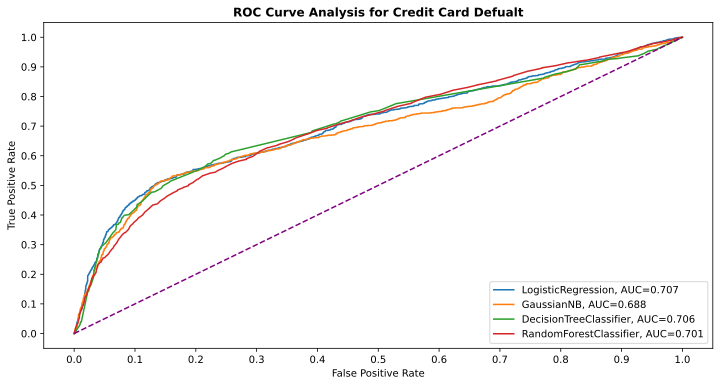

In [70]:
'''Receiver Operating Characteristic(ROC) curve is a plot of 
the true positive rate against the false positive rate. It shows 
the tradeoff between sensitivity and specificity.'''

fig = plt.figure(figsize=(12,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='purple', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis for Credit Card Defualt', fontweight='bold', fontsize=12)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [71]:
def make_ind_pred(ind_data):
    data = ind_data.values.reshape(1,-1)
    #data = StandardScaler.transform(df_credit_data)
    prob = lr2.predict_proba(X_te1)[0][1]
    
    if prob >= .45:
        return 'Will Defualt'
    else:
        return 'Will Pay'
        
    

In [72]:
from collections import OrderedDict

In [73]:
#clientID 22 = # Defualted

new_cust = OrderedDict([('LIM_BALANCE', 120000), ('SEX',2),('EDUCATION', 2),('MARRIAGE',2),
                        ('AGE', 39), ('PAY_1', 1),('PAY_2',1),('PAY_3',1),('PAY4',1),('PAY5',1),('PAY6',1),
                        ('BILL_AMT1',316),('BILL_AMT2',316),('BILL_AMT3',316),('BILL_AMT4',0),('BILL_AMT5',632),
                        ('BILL_AMT6',316),('PAY_AMT1',316),('PAY_AMT2',316),('PAY_AMT3',0),('PAY_AMT4',632),
                        ('PAY_AMT5',316),('PAY_AMT6',0)])

new_cust =pd.Series(new_cust)
make_ind_pred(new_cust)


'Will Defualt'

In [74]:
#clientID 12= # Paid

new_cust1 = OrderedDict([('LIM_BALANCE', 260000), ('SEX',2),('EDUCATION', 1),('MARRIAGE',2),
                        ('AGE', 53), ('PAY_1', -1),('PAY_2',-1),('PAY_3',-1),('PAY4',-1),('PAY5',-1),('PAY6',2),
                        ('BILL_AMT1',12261),('BILL_AMT2',21261),('BILL_AMT3',9966),('BILL_AMT4',8517),
                        ('BILL_AMT5',22281),('BILL_AMT6',12668),('PAY_AMT1',21818),('PAY_AMT2',9966),
                        ('PAY_AMT3',8583),('PAY_AMT4',22301),
                        ('PAY_AMT5',0),('PAY_AMT6',3640)])

new_cust1 =pd.Series(new_cust1)
make_ind_pred(new_cust1)




'Will Defualt'

In [75]:
#Decided to go Logistic regression since feature importance shows top 4 or e5 mostly numerical 
#feature therefor I chose to logisitic regsion instead of 